In [1]:
import gym
from matplotlib import pyplot as plt
import time
import numpy as np
import scipy
import cv2
from IPython import display
import scipy.optimize
%matplotlib inline

In [4]:
# ACTIONS
FULL_AHEAD = [0, 1, 0]
HALF_AHEAD = [0, 0.1, 0]
FULL_LEFT = [-1, 0.1, 0]
FULL_RIGHT = [1, 0.1, 0]
NULL_ACTION = [0, 0, 0]

# PIXELS
LIGHT_GREEN = [100, 228, 100]
DARK_GREEN = [100, 228, 100]
ROAD = [100, 100, 100]

In [5]:
env = gym.make("CarRacing-v2", new_step_api=True)
env.action_space.seed(42)
def reset_env():
    observation, info = env.reset(seed=42, return_info=True)
    for _ in range(50):
        observation, _, _, _, _ = env.step(NULL_ACTION)
        
    return observation
_ = reset_env()

In [4]:
# API
env.action_space

Box([-1.  0.  0.], 1.0, (3,), float32)

In [7]:
#### RANDOM JUST FORWARD
reset_env()
for i in range(50):
    observation, reward, done, info, _ = env.step([0, 100, 0])
    if done:
        reset_env()
#     observation, reward, done, info, _ = env.step(env.action_space.sample())
    if i % 3 ==0:
#         plt.imshow(observation)
        env.render()
#         display.display(plt.gcf())
#         display.clear_output(wait=True)

/opt/homebrew/Caskroom/miniconda/base/envs/hackathon/lib/python3.10/site-packages/gym/core.py:57: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [18]:
#### AMAZING AI
def get_actionv1(obervation):
    
    def middle_ahead_is_road():
        middle = observation[0, 48, :]
        return np.linalg.norm(ROAD - middle) < 10
    if middle_ahead_is_road():
        return FULL_AHEAD

def get_actionv2(obervation):
    def middle_ahead_is_road():
        middle = observation[25, 48, :]
        return np.linalg.norm(ROAD - middle) < 10
    
    if middle_ahead_is_road():
        return HALF_AHEAD, "middle_ahead_is_road"
    return FULL_LEFT, "DEFAULT"
    
get_action = get_actionv2

In [23]:
#### AMAZING AI functions
observation = reset_env()

for i in range(500):
    action, action_name = get_action(observation)
    observation, reward, done, info, _ = env.step(action)
    if done:
        observation = reset_env()
    
    env.render()
#         plt.imshow(observation)
#         display.display(plt.gcf())
#         display.clear_output(wait=True)
#     if i % 3 ==0:

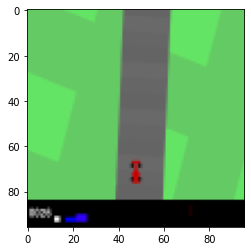

In [76]:
plt.imshow(observation)
plt.show()

In [24]:
def get_actionv1(obervation):
    if middle_ahead_is_road(observation):
        return FULL_THROTTLE

def get_actionv2(obervation):
    if middle_ahead_is_road(observation):
        return FULL_THROTTLE, "middle_ahead_is_road"
    return FULL_LEFT, "DEFAULT"
    
get_action = get_actionv2

In [41]:
# action functions

def pixel_is_road(pixel):
    np.linalg.norm(ROAD - middle) < 10

def middle_ahead_is_road(observation):
    middle = observation[0, 48, :]
    return pixel_is_road(middle)
    

In [6]:
observation = reset_env()
color_copy = observation.copy()

In [51]:
def get_mask(observation):
    return np.linalg.norm(observation - ROAD, axis=-1) < 10

def objective(t, a, b, c, d):
    x = a * t + b
    y = c * t + d
    return x, y

def fit_curve(observation):
    mask = get_mask(observation)
    
    h, w, c = observation.shape
    w_coords, h_coords = np.meshgrid(np.arange(h), np.arange(w))
    out = np.vstack([h_coords[mask], w_coords[mask]])
    print(out)
    popt, _ = scipy.optimize.curve_fit(objective, range(out, (out[0,:], out[1,:])
    print(f"a={a}, b={b}, c={c}")
    return popt[0], popt[1], popt[2]

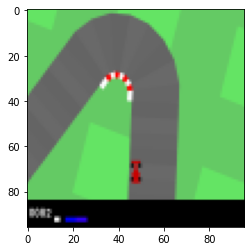

In [45]:
observation = reset_env()
for i in range(185):
    observation, reward, done, info, _ = env.step(HALF_AHEAD)
    if done:
        observation = reset_env()
    
#     env.render()
#     print(i)
    plt.imshow(observation)
#     plt.show()
    

In [46]:
sharp_left_curve = observation

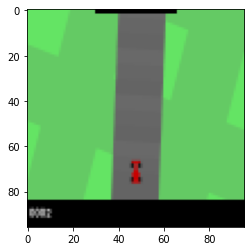

[[ 2  2  2 ... 88 90 91]
 [36 37 38 ...  3  5  6]]
a=0.010393691183687905, b=-0.7657896920781928, c=3


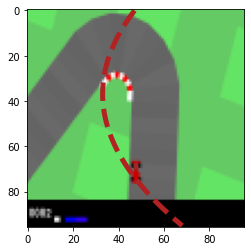

In [52]:
color_copy[0:2, 30:66, :] = 0
plt.imshow(color_copy)
plt.show()
# low_threshold  = 50
# high_threshold = 100
# plt.imshow(cv2.Canny(observation, low_threshold, high_threshold))

# mask = np.zeros((observation.shape[0], observation.shape[1]))
# mask = np.ma.masked_where(ar2%7,ar1)

# mask = np.linalg.norm(ROAD - observation)
# print(mask.shape)
# plt.imshow(mask)
# plt.show()

# print(out)


# x_values = [pixel for pixel in mask[mask==1]]
# positions=zip(*np.where(mask == 1))
# w_coord, y_coord
# print((positions.))
# y_values = [mask[1] for mask==1]
# y_values = 
# objective = 



    
a, b, c = fit_curve(sharp_left_curve)

x = range(96)
y = [objective(x, a, b, c) for x in range(96)]

fig, ax = plt.subplots()
ax.imshow(sharp_left_curve)
ax.plot(y, x, '--', linewidth=5, color='firebrick')


# plt.scatter(range(96), [objective(x, a, b) for x in range(96)])
# plt.xlim([0,96])
# plt.ylim([0,96])



In [87]:
LIGHT_GREEN = [100, 228, 100]
DARK_GREEN = [100, 228, 100]
ROAD = [100, 100, 100]
left = observation[0, 30, :]
middle = observation[0, 48, :]
print("left: ", left)
print("middle: ", middle)
print("right: ", observation[0, 66, :])

left:  [100 228 100]
middle:  [100 100 100]
right:  [100 228 100]


In [89]:
# np.linalg.norm(ROAD - left)
ROAD - left

array([   0, -128,    0])